In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [38]:
df=pd.read_csv('diabetes1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [39]:
df.dropna()
df= df[np.isfinite(df).all(1)]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
6,3.0,78,50.0,32.0,88.0,31.0,0.248,26.0,1.0
...,...,...,...,...,...,...,...,...,...
761,9.0,170,74.0,31.0,0.0,44.0,0.403,43.0,1.0
762,9.0,89,62.0,0.0,0.0,22.5,0.142,33.0,0.0
763,10.0,101,76.0,48.0,180.0,32.9,0.171,63.0,0.0
765,5.0,121,72.0,23.0,112.0,26.2,0.245,30.0,0.0


In [40]:
X=df.iloc[:,1].values
y=df.iloc[:,-1].values


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [42]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred=reg.predict(X_test)
y_pred

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [44]:
print("Predicted value")
print(y_pred[:10])
print('Actual Value')
print(y_test[:10])

Predicted value
[0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
Actual Value
[1. 0. 1. 0. 1. 0. 0. 0. 0. 1.]


In [45]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
print("Precision: ",metrics.precision_score(y_test,y_pred,average='weighted'))
print("recall Score: ",metrics.recall_score(y_test,y_pred,average='weighted'))
print("F1 score: ",metrics.f1_score(y_test,y_pred,average='weighted'))
print("MCC: ",metrics.matthews_corrcoef(y_test,y_pred))

Accuracy:  0.7315436241610739
Precision:  0.7198445006784758
recall Score:  0.7315436241610739
F1 score:  0.7059899885756472
MCC:  0.3382669902723721


              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82       100
         1.0       0.67      0.37      0.47        49

    accuracy                           0.73       149
   macro avg       0.71      0.64      0.65       149
weighted avg       0.72      0.73      0.71       149



<Axes: >

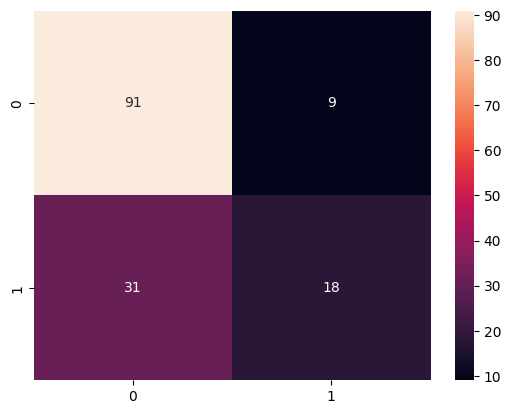

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

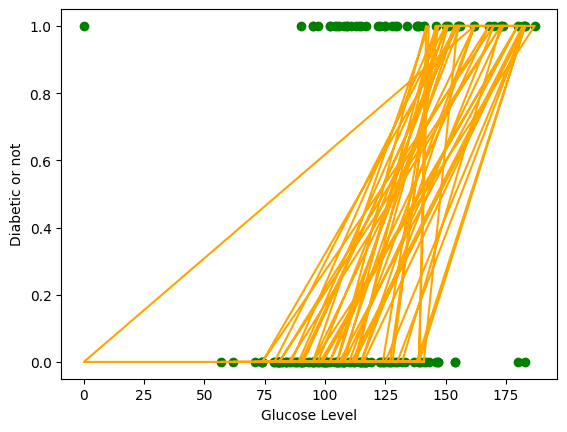

In [47]:
plt.scatter(X_test,y_test, color = 'g')
plt.plot(X_test,reg.predict(X_test),color = 'orange')
plt.xlabel("Glucose Level")
plt.ylabel("Diabetic or not")
plt.show()